In [48]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [49]:
experiments_dir = os.path.join(os.getcwd(), 'experiment_results')
experiments_dir

'/Users/oziomek/software/tensorcell/EMT6-Ro/python_ga/experiment_results'

In [50]:
experiment_paths = [os.path.join(experiments_dir, file) for file in os.listdir(experiments_dir)]
experiment_paths

['/Users/oziomek/software/tensorcell/EMT6-Ro/python_ga/experiment_results/base__tournament__dose_value_time_value_12-07-2020_13:50:15',
 '/Users/oziomek/software/tensorcell/EMT6-Ro/python_ga/experiment_results/base__tournament__dose_value_time_value_12-07-2020_13:52:28']

In [62]:
experiments = []
for experiment_path in experiment_paths:
    config = [file for file in os.listdir(experiment_path) if 'config' in file][0]
    config_file = os.path.join(experiment_path, config)
    metric = [file for file in os.listdir(experiment_path) if 'metric' in file][0]
    metric_file = os.path.join(experiment_path, metric)
    
    with open(config_file, 'r') as f:
        config = f.read()
    config = eval(config)
    metric = pd.read_csv(metric_file, index_col=0)
    
    experiments.append({
        'config': config,
        'metric': metric,
    })

In [77]:
experiments[0]['config']

{'num_gpus': 2,
 'num_protocols': 10,
 'num_tests': 10,
 'hour_steps': 600,
 'protocol_resolution': 300,
 'step_value': 0.25,
 'max_value': 10,
 'select_n': 0.5,
 'max_iter': 100,
 'stop_fitness': 1000000,
 'cross_type': 'normalized_crossover',
 'selection': {'type': 'tournament_selection_classic', 'probability': 0.9},
 'mutations': {'mutate_dose_value': {'mut_prob': 0.05,
   'min_value': 0.25,
   'max_value': 10,
   'step_value': 0.25},
  'mutate_time_value': {'mut_prob': 0.05}},
 'save_every_iteration': True,
 'save_only_last_iteration': False,
 'config_path': 'python_ga/experiment_config/base__tournament__dose_value_time_value.yaml',
 'experiment_time': '12-07-2020_13:50:15',
 'saving_path': '/Users/oziomek/software/tensorcell/EMT6-Ro/python_ga/experiment_results/base__tournament__dose_value_time_value_12-07-2020_13:50:15'}

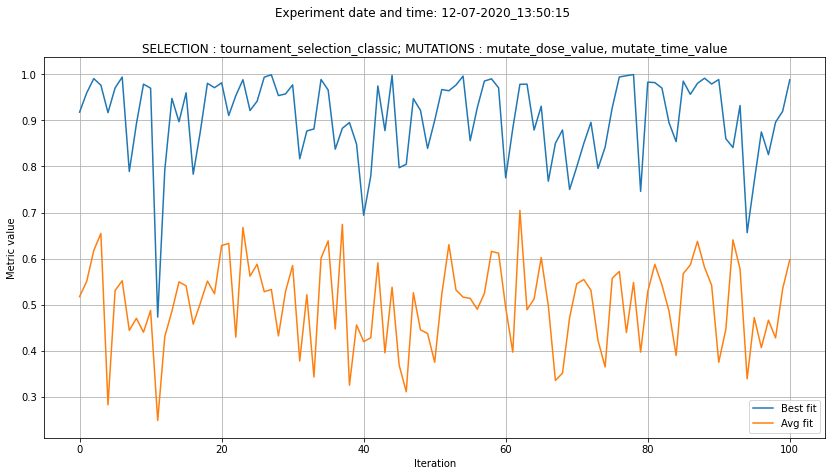

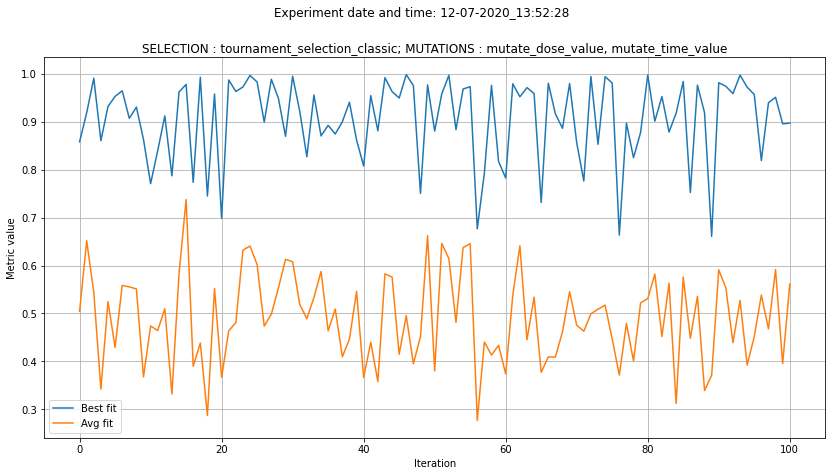

In [76]:
for experiment in experiments:

    plt.figure(figsize=(14, 7))
    plt.plot(experiment['metric'].best_fit, label='Best fit')
    plt.plot(experiment['metric'].avg_fit, label='Avg fit')
    plt.xlabel('Iteration')
    plt.ylabel('Metric value')

    plt.title(f"SELECTION : {experiment['config']['selection']['type']}; MUTATIONS : {', '.join(experiments[0]['config']['mutations'].keys())}")
    plt.suptitle(f"Experiment date and time: {experiment['config']['experiment_time']}")
    plt.legend()
    plt.grid()
    plt.show()